# V2 Notebook

# TODOs:

### Searchsploit
### Full auto cross tool URL collection and traversal
### 'IP Forwarded By' hiding

https://eightytwo.net/blog/brute-forcing-the-admin-password-on-nibbles/

In [1]:
from web_footprinting_utils import setup_ipython

get_ipython, INTERACTIVE = setup_ipython()

In [2]:
%env TARGET=10.10.129.232
%env PORT=80

env: TARGET=10.10.129.232
env: PORT=80


In [3]:
import os 

port = os.environ['PORT']
target_site = os.environ['TARGET']
!ping -c 5 $TARGET

PING 10.10.129.232 (10.10.129.232) 56(84) bytes of data.

--- 10.10.129.232 ping statistics ---
5 packets transmitted, 0 received, 100% packet loss, time 4044ms



In [4]:
from web_footprinting_utils import WebsiteRecord, LinkRecorder

record = WebsiteRecord(target_site, directory="", port=port)

fingerprinting http://10.10.129.232:80


Whatweb:
zsh:1: command not found: whatweb


Ffuf:
Encountered error(s): 1 errors occurred.
	* stat /usr/share/dirb/wordlists/common.txt: no such file or directory

Fuzz Faster U Fool - v1.3.1 Kali Exclusive <3

HTTP OPTIONS:
  -H                  Header `"Name: Value"`, separated by colon. Multiple -H flags are accepted.
  -X                  HTTP method to use
  -b                  Cookie data `"NAME1=VALUE1; NAME2=VALUE2"` for copy as curl functionality.
  -d                  POST data
  -ignore-body        Do not fetch the response content. (default: false)
  -r                  Follow redirects (default: false)
  -recursion          Scan recursively. Only FUZZ keyword is supported, and URL (-u) has to end in it. (default: false)
  -recursion-depth    Maximum recursion depth. (default: 0)
  -recursion-strategy Recursion strategy: "default" for a redirect based, and "greedy" to recurse on all matches (default: default)
  -replay-proxy       R

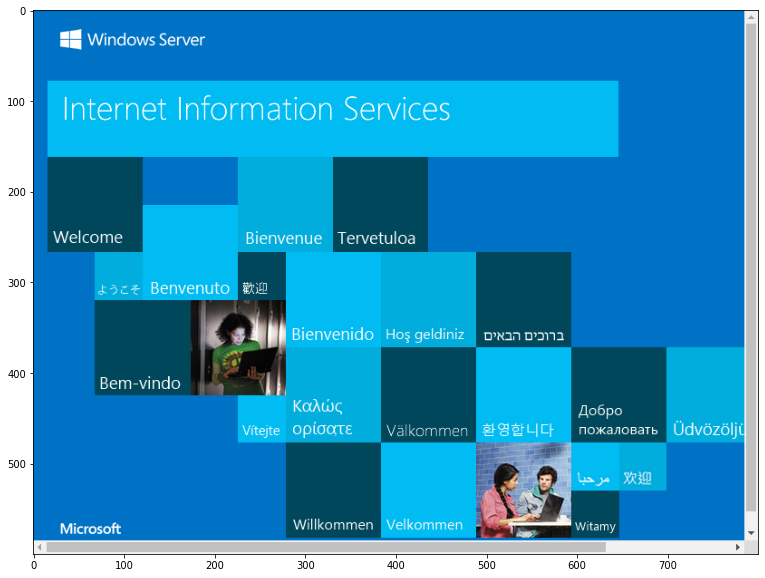

In [5]:
%matplotlib inline
results = record.fingerprint_page()

In [6]:
record.fingerprint_extended()



Ffuf Extensions:
Encountered error(s): 1 errors occurred.
	* stat /usr/share/dirb/wordlists/common.txt: no such file or directory

Fuzz Faster U Fool - v1.3.1 Kali Exclusive <3

HTTP OPTIONS:
  -H                  Header `"Name: Value"`, separated by colon. Multiple -H flags are accepted.
  -X                  HTTP method to use
  -b                  Cookie data `"NAME1=VALUE1; NAME2=VALUE2"` for copy as curl functionality.
  -d                  POST data
  -ignore-body        Do not fetch the response content. (default: false)
  -r                  Follow redirects (default: false)
  -recursion          Scan recursively. Only FUZZ keyword is supported, and URL (-u) has to end in it. (default: false)
  -recursion-depth    Maximum recursion depth. (default: 0)
  -recursion-strategy Recursion strategy: "default" for a redirect based, and "greedy" to recurse on all matches (default: default)
  -replay-proxy       Replay matched requests using this proxy.
  -timeout            HTTP reque

# Main Checks Complete!

In [ ]:
input("Press any keys...")

In [ ]:
%matplotlib inline
record_alt = WebsiteRecord(target_site, directory="/blog", port=80)
record_alt.fingerprint_page()
record_alt.fingerprint_extended()

In [ ]:
%matplotlib inline
record_alt = WebsiteRecord(target_site, directory="/blog/wp-content", port=80)
record_alt.fingerprint_page()
record_alt.fingerprint_extended()

In [ ]:
%matplotlib inline
record_alt = WebsiteRecord(target_site, directory="/blog/wp-content/plugins", port=80)
record_alt.fingerprint_page()
record_alt.fingerprint_extended()

In [ ]:
%matplotlib inline
record_alt = WebsiteRecord(target_site, directory="/blog/wp-content/plugins/akismet", port=80)
record_alt.fingerprint_page()
record_alt.fingerprint_extended()

In [ ]:
from web_footprinting_utils import save_notebook

save_notebook()

In [ ]:
if INTERACTIVE:
    !jupyter nbconvert --to script "3_Web_Footprinting_V2.ipynb"